In [77]:
import pandas as pd

# Dataset
data = pd.read_csv("C:/Users/benj/lulc-air-quality/dataset/data.csv")

(0.000133, 0.000156]    30786
(0.000156, 0.000179]    36212
Name: NO2_column_number_density, dtype: int64


<Axes: >

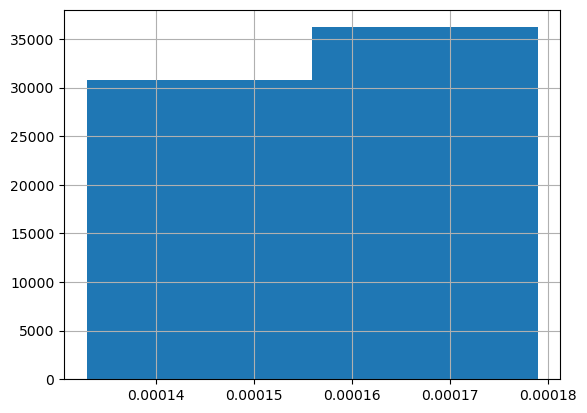

In [78]:
# Just to understand the dist. more
bins = pd.qcut(data['NO2_column_number_density'], 3)
print(bins.value_counts(sort=False))
# Visually showing what it would mean to discretize the bins into categorical attributes
data['NO2_column_number_density'].hist(bins=3)

In [65]:
# Discretize the attributes using equal width method
data['NO2_column_number_density'] = pd.qcut(x=data['NO2_column_number_density'], labels=["Low", "Medium", "High"], q=3)

print(data['NO2_column_number_density'].head(100))

0     Medium
1     Medium
2     Medium
3     Medium
4     Medium
       ...  
95    Medium
96    Medium
97    Medium
98    Medium
99    Medium
Name: NO2_column_number_density, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


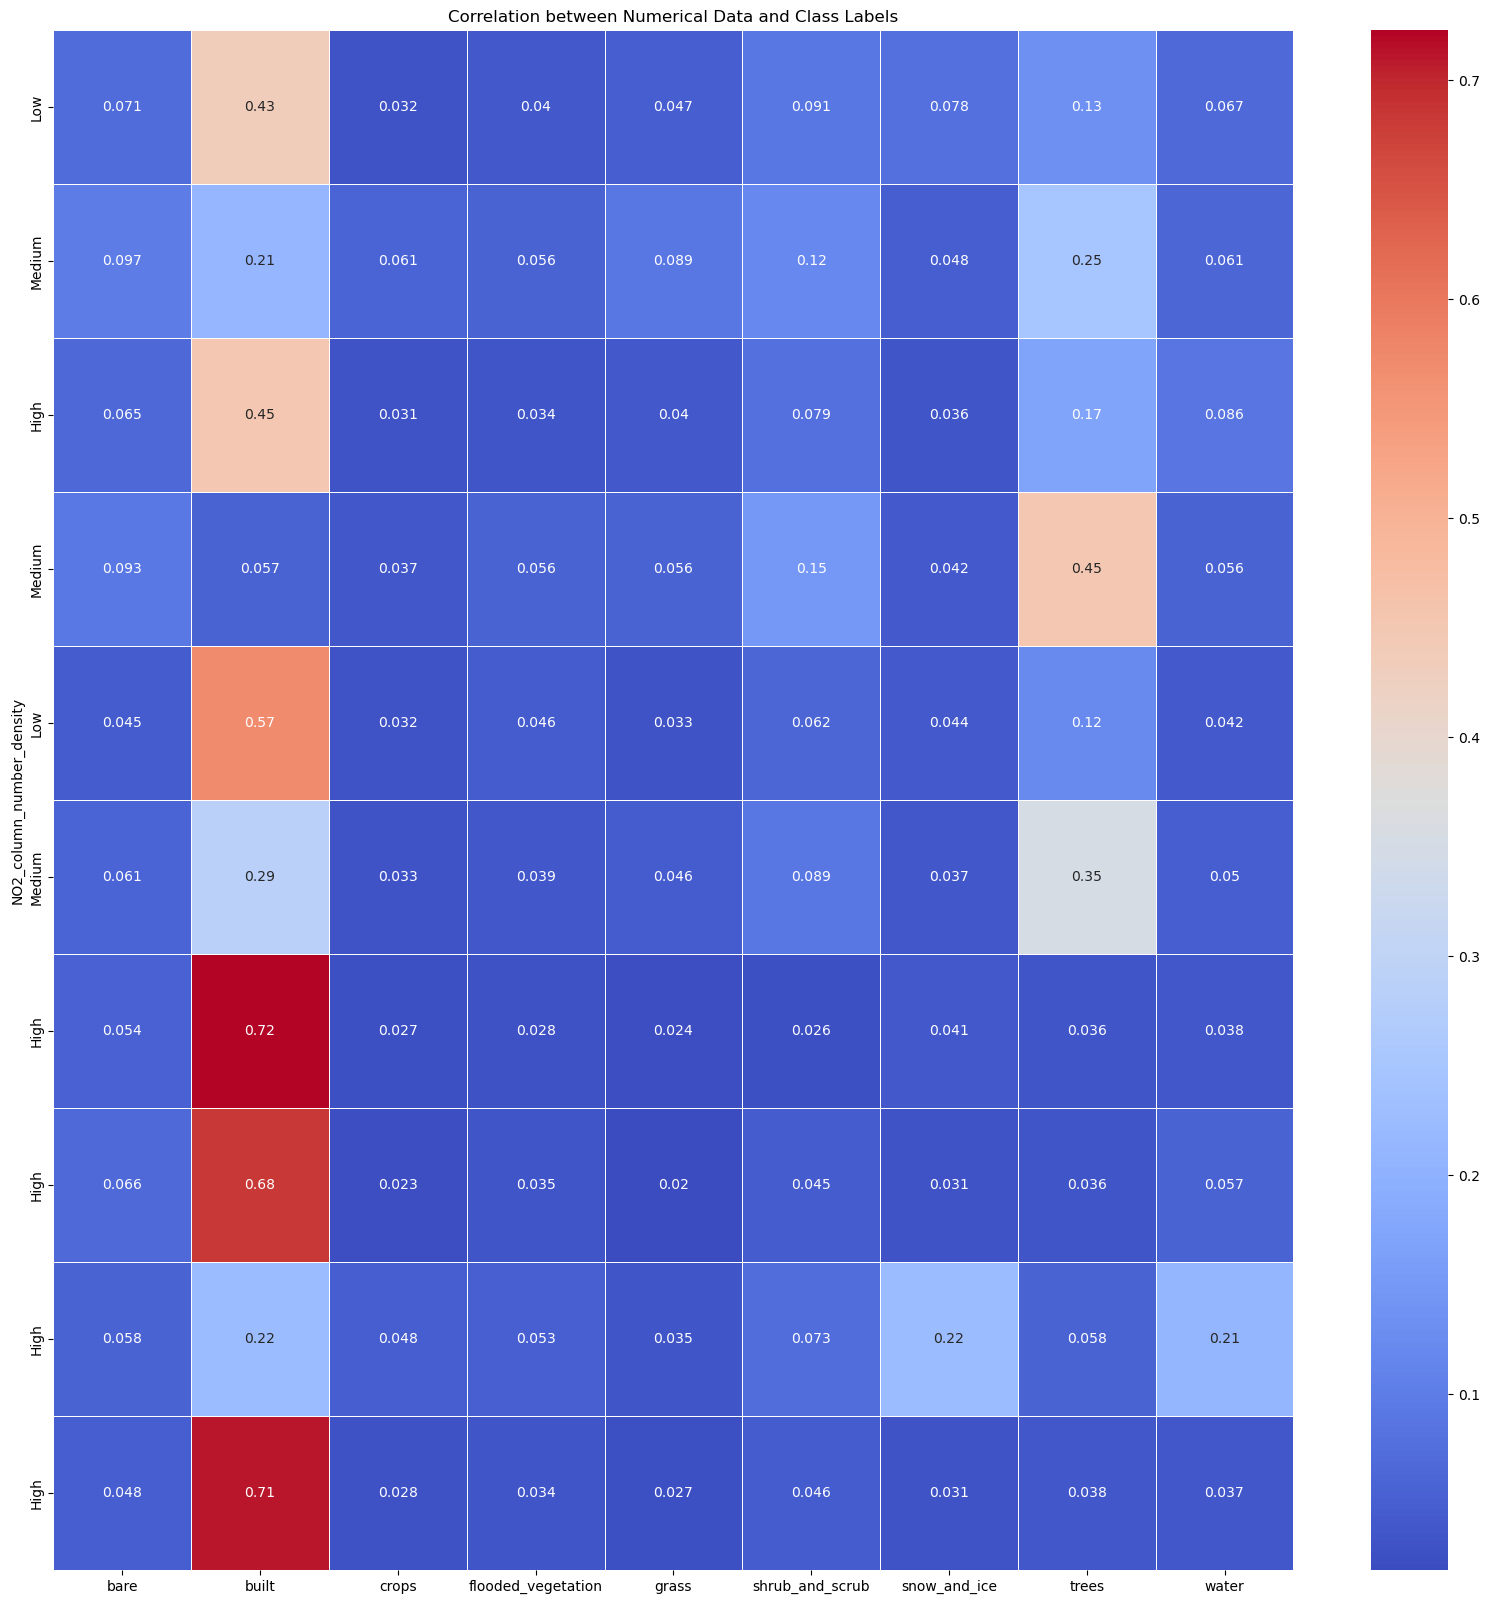

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data.sample(n=10) 

sample.set_index('NO2_column_number_density', inplace=True)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Numerical Data and Class Labels')
plt.show()


In [67]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:         bare  built  crops  flooded_vegetation  grass  shrub_and_scrub  \
0      0.13   0.03   0.06                0.10   0.03             0.12   
1      0.14   0.03   0.06                0.08   0.04             0.15   
2      0.17   0.05   0.06                0.05   0.05             0.15   
3      0.16   0.15   0.07                0.04   0.06             0.16   
4      0.10   0.31   0.06                0.04   0.06             0.14   
...     ...    ...    ...                 ...    ...              ...   
66993  0.05   0.65   0.05                0.04   0.05             0.05   
66994  0.06   0.65   0.05                0.03   0.05             0.06   
66995  0.05   0.69   0.04                0.03   0.04             0.04   
66996  0.04   0.71   0.03                0.03   0.03             0.04   
66997  0.04   0.72   0.03                0.03   0.03             0.03   

       snow_and_ice  trees  water  
0              0.04   0.42   0.07  
1              0.04   0.40   0.0

In [68]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# DTC
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None, class_weight=None)

# Train the model
dtc.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtc.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [69]:
print("Accuracy: ", accuracy)
print(report)

Accuracy:  0.595820895522388
              precision    recall  f1-score   support

        High       0.66      0.78      0.71      4458
         Low       0.58      0.56      0.57      4445
      Medium       0.53      0.45      0.49      4497

    accuracy                           0.60     13400
   macro avg       0.59      0.60      0.59     13400
weighted avg       0.59      0.60      0.59     13400



In [70]:
correlation_matrix = data.corr()
print("correlation_matrix: ", correlation_matrix)

correlation_matrix:                      bare  built  crops  flooded_vegetation  grass  \
bare                1.00  -0.48   0.25                0.21   0.19   
built              -0.48   1.00  -0.43               -0.38  -0.48   
crops               0.25  -0.43   1.00                0.30   0.50   
flooded_vegetation  0.21  -0.38   0.30                1.00   0.23   
grass               0.19  -0.48   0.50                0.23   1.00   
shrub_and_scrub     0.50  -0.81   0.39                0.44   0.50   
snow_and_ice        0.23  -0.28   0.07                0.10   0.06   
trees               0.09  -0.78   0.06                0.05   0.11   
water               0.21  -0.26   0.15                0.35  -0.01   

                    shrub_and_scrub  snow_and_ice  trees  water  
bare                           0.50          0.23   0.09   0.21  
built                         -0.81         -0.28  -0.78  -0.26  
crops                          0.39          0.07   0.06   0.15  
flooded_vegetation      

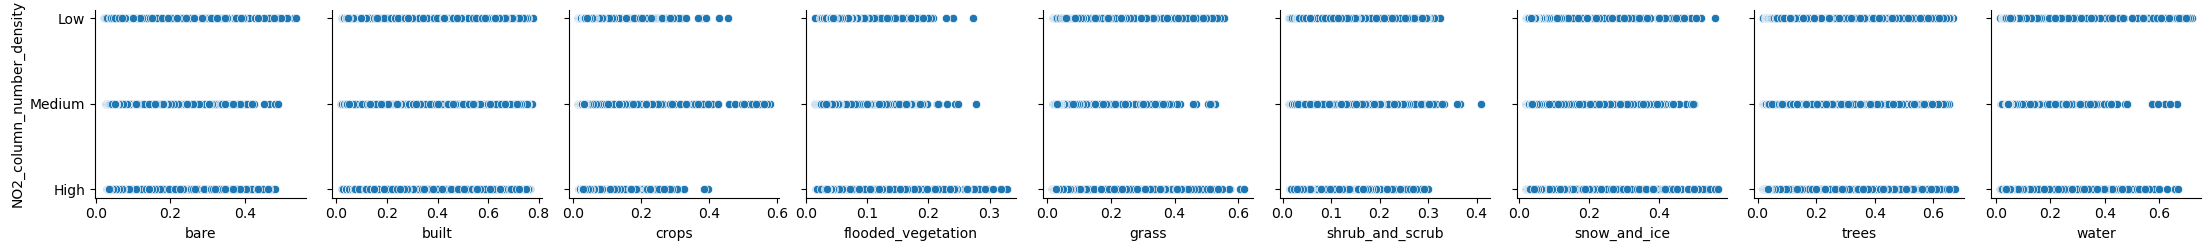

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the relationship between air quality attr. related to the LULC class labels
sns.pairplot(data, x_vars=['bare', 'built', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'], y_vars='NO2_column_number_density', kind='scatter')
plt.show()

In [72]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:         bare  built  crops  flooded_vegetation  grass  shrub_and_scrub  \
0      0.13   0.03   0.06                0.10   0.03             0.12   
1      0.14   0.03   0.06                0.08   0.04             0.15   
2      0.17   0.05   0.06                0.05   0.05             0.15   
3      0.16   0.15   0.07                0.04   0.06             0.16   
4      0.10   0.31   0.06                0.04   0.06             0.14   
...     ...    ...    ...                 ...    ...              ...   
66993  0.05   0.65   0.05                0.04   0.05             0.05   
66994  0.06   0.65   0.05                0.03   0.05             0.06   
66995  0.05   0.69   0.04                0.03   0.04             0.04   
66996  0.04   0.71   0.03                0.03   0.03             0.04   
66997  0.04   0.72   0.03                0.03   0.03             0.03   

       snow_and_ice  trees  water  
0              0.04   0.42   0.07  
1              0.04   0.40   0.0

In [73]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions for class labels
y_pred = rf_clf.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [74]:
print("Accuracy: ", accuracy)
print(report)

Accuracy:  0.6467910447761194
              precision    recall  f1-score   support

        High       0.70      0.82      0.75      4458
         Low       0.64      0.61      0.63      4445
      Medium       0.58      0.51      0.54      4497

    accuracy                           0.65     13400
   macro avg       0.64      0.65      0.64     13400
weighted avg       0.64      0.65      0.64     13400



In [75]:
# Determining what attr. hold % of class labels
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

trees                0.16
bare                 0.13
grass                0.12
built                0.11
snow_and_ice         0.10
flooded_vegetation   0.10
shrub_and_scrub      0.10
crops                0.09
water                0.09
dtype: float64


In [ ]:
!pip install lazypredict

In [76]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [27:23<02:40, 53.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 53598, number of used features: 9
[LightGBM] [Info] Start training from score -1.098724
[LightGBM] [Info] Start training from score -1.095818
[LightGBM] [Info] Start training from score -1.101303


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [27:24<00:00, 56.69s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.64               0.64    None      0.64   
ExtraTreesClassifier               0.64               0.64    None      0.64   
LGBMClassifier                     0.63               0.63    None      0.63   
SVC                                0.63               0.63    None      0.62   
LabelSpreading                     0.62               0.62    None      0.61   
LabelPropagation                   0.62               0.62    None      0.61   
NuSVC                              0.62               0.62    None      0.61   
BaggingClassifier                  0.61               0.61    None      0.60   
KNeighborsClassifier               0.60               0.61    None      0.60   
AdaBoostClassifier                 0.58               0.58    None      0.58   
LogisticRegression                 0.54 